#**Original** **dataset** **has** **these** **as** **its** **original** **labels**.
#**Airplane** : 0

#**Automobile** : 1

#**Bird** : 2

#**Cat** : 3

#**Deer** : 4

#**Dog** : 5

#**Frog** : 6

#**Horse** : 7

#**Ship** : 8

# **Truck** : 9

```
*# This is formatted as code*
```



# bold text **bold text**

# Importing Libraries

In [2]:
import pickle
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import keras as k
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Using TensorFlow backend.


In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.regularizers import Regularizer
import keras.regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam

# Importing Data

170500096/170498071 [==============================] - 80s 0us/step


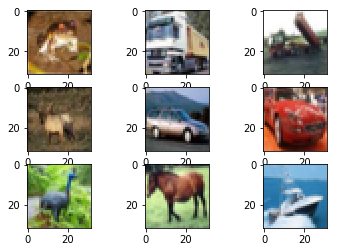

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

#**Creating Train-Test-Validation sets**

```
# This is formatted as code
```



In [0]:
x_val_1= x_test
y_val_1= y_test
x_val_2= x_train[45_000:]
y_val_2= y_train[45_000:]


#**Check if Validation set is unique or not**

In [0]:
np.unique(y_val_1, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [0]:
np.unique(y_val_2, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([493, 488, 479, 519, 475, 529, 488, 485, 532, 512]))

#**Data augmentation, to change how the data look in different angles to get a better idea for genralisation**


In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    #zoom_range=0.3
    )



In [0]:
datagen.fit(x_train)

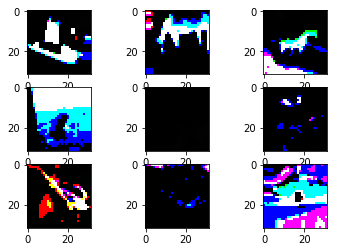

In [0]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
        plt.xticks()
        plt.yticks()
    plt.show()
    break


In [0]:
num_classes=10

In [0]:
x_train = x_train.astype('float32')
x_val_1 = x_val_1.astype('float32')
x_train /= 255
x_val_1 /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val_1.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#**labels (convert to binary classes)**

In [0]:

num_classes = 10
y_train = k.utils.to_categorical(y_train, num_classes)
y_val_1 = k.utils.to_categorical(y_val_1, num_classes)

In [0]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_val_1=x_val_1.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_val_1=(x_val_1-mean)/std
x_train=(x_train-mean)/std

In [0]:
def plot_histogram(hist):
    plt.plot(hist.H2['acc'])
    plt.plot(hist.H2['val_acc'])
    plt.title('model evaluation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'bottom right')

# Making Neural Net

In [0]:
batch_size = 500
epochs = 1

In [0]:
# reg_rate= 10**-5
# conv_dim= 3
# pool_dim= 2
# act= 'relu'
# dropout_rate= 0.5
# conv_neurons= 100
# normal_neurons= 110

In [0]:
# build and compile the model  (roughly following the VGG paper)
reg_rate= 10**-5
conv_dim= 3
pool_dim= 2
act= 'relu'
dropout_rate= 0.5
conv_neurons= 120
normal_neurons= 180


model = Sequential()
model.add(Conv2D(conv_neurons, kernel_size=(conv_dim, conv_dim), activation=act, input_shape=(32,32,3)))
model.add(Conv2D(conv_neurons, (conv_dim, conv_dim), activation=act))
model.add(Conv2D(conv_neurons, (conv_dim, conv_dim), activation=act))


model.add(MaxPooling2D(pool_size=(pool_dim, pool_dim)))
model.add(Dropout(dropout_rate))
model.add(Conv2D(conv_neurons, (conv_dim, conv_dim), activation=act))
model.add(Conv2D(conv_neurons, (conv_dim, conv_dim), activation=act))
model.add(Conv2D(conv_neurons, (conv_dim, conv_dim), activation=act))


model.add(MaxPooling2D(pool_size=(pool_dim, pool_dim)))
model.add(Dropout(dropout_rate))
model.add(Flatten())

model.add(Dense(normal_neurons, activation=act, activity_regularizer=keras.regularizers.l2(reg_rate)))

model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x_train_5= np.concatenate((x_train, x_train, x_train, x_train, x_train))

In [0]:
y_train_5 = np.concatenate((y_train, y_train, y_train, y_train, y_train))

In [0]:
history =model.fit_generator(datagen.flow(x_train_5, y_train_5, batch_size=1000),
                    steps_per_epoch = len(x_train_5) / 1000, epochs=50, validation_data=(x_val_1, y_val_1))

Epoch 1/50
250/250 [==============================] - 154s 615ms/step - loss: 1.6778 - acc: 0.4047 - val_loss: 1.4674 - val_acc: 0.4916
Epoch 2/50
250/250 [==============================] - 147s 589ms/step - loss: 1.5241 - acc: 0.4680 - val_loss: 1.3426 - val_acc: 0.5439
Epoch 3/50
250/250 [==============================] - 148s 593ms/step - loss: 1.3981 - acc: 0.5177 - val_loss: 1.1308 - val_acc: 0.6292
Epoch 4/50
250/250 [==============================] - 148s 590ms/step - loss: 1.3007 - acc: 0.5576 - val_loss: 1.1011 - val_acc: 0.6221
Epoch 5/50
250/250 [==============================] - 148s 591ms/step - loss: 1.2104 - acc: 0.5947 - val_loss: 1.0900 - val_acc: 0.6269
Epoch 6/50
250/250 [==============================] - 149s 596ms/step - loss: 1.1328 - acc: 0.6237 - val_loss: 0.9033 - val_acc: 0.7092
Epoch 7/50
250/250 [==============================] - 146s 585ms/step - loss: 1.0681 - acc: 0.6479 - val_loss: 0.8983 - val_acc: 0.7106
Epoch 8/50
250/250 [============================

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 120)       3360      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 120)       129720    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 120)       129720    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 120)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 120)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 120)       129720    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 120)         129720    
__________

In [0]:
H2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_val_1, y_val_1))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 34s 679us/step - loss: 0.3667 - acc: 0.8863 - val_loss: 0.4737 - val_acc: 0.8524
Epoch 2/100
50000/50000 [==============================] - 32s 632us/step - loss: 0.3428 - acc: 0.8941 - val_loss: 0.4395 - val_acc: 0.8597
Epoch 3/100
50000/50000 [==============================] - 32s 633us/step - loss: 0.3316 - acc: 0.8978 - val_loss: 0.4437 - val_acc: 0.8607
Epoch 4/100
50000/50000 [==============================] - 32s 632us/step - loss: 0.3109 - acc: 0.9034 - val_loss: 0.4378 - val_acc: 0.8673
Epoch 5/100
50000/50000 [==============================] - 32s 632us/step - loss: 0.3008 - acc: 0.9075 - val_loss: 0.4442 - val_acc: 0.8629
Epoch 6/100
50000/50000 [==============================] - 32s 631us/step - loss: 0.2925 - acc: 0.9111 - val_loss: 0.4513 - val_acc: 0.8596
Epoch 7/100
50000/50000 [==============================] - 32s 633us/step - loss: 0.2903 - acc: 0.9101 - val_l

In [0]:
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc

#**Plot accuracy-epochs plot**

In [0]:
plot_histogram(history)

In [0]:
from google.colab import files
files.download('new_as_of_19:20.txt')

In [0]:
model = save_model('./final_stuff')
